In [1]:
import seaborn as sns
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import rospkg
import pandas as pd
import numpy as np
import yaml
import math
import matplotlib.cm as cm
import matplotlib

def color_map_color(value, cmap_name='Reds', vmin=0, vmax=1):
    # norm = plt.Normalize(vmin, vmax)
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  # PiYG
    rgb = cmap(norm(abs(value)))[:3]  # will return rgba, we take only first 3 so we get rgb
    color = matplotlib.colors.rgb2hex(rgb)
    return color

dirname = rospkg.RosPack().get_path('mrpp_sumo')

In [2]:
#name of the yaml/output files
name = 'arv25'

#path to directory containing 'config' and 'outputs'
dirdata = '/home/sdeepakmallya/data_hd/mrpp_sumo_backup/27_01_2021/'

In [3]:
#get config and parameters
with open('{}/config/{}.yaml'.format(dirdata,name), 'r') as f:
    config = yaml.load(f, yaml.FullLoader)
# print(config)

graph = nx.read_graphml(dirname + '/graph_ml/{}.graphml'.format(config['graph']))
nodes = list(graph.nodes())
edges = [graph[e[0]][e[1]]['name'] for e in list(graph.edges())]
n = len(nodes)
num_bots = int(config['init_bots'])
sim_length = int(config['sim_length'])
algo_name = config['algo_name']

In [41]:
#read visits.in data for a given config
cols_n = ['time']
cols_n.extend(nodes)
df1 = pd.DataFrame(columns = cols_n)
cols_e = ['time']
cols_e.extend(edges)
df2 = pd.DataFrame(columns = cols_e)
df3 = pd.DataFrame(columns = nodes, index = ['bot_{}'.format(i) for i in range(num_bots)])
df3 = df3.fillna(0)         

with open('{}/outputs/{}_visits.in'.format(dirdata, name), 'r') as f:
    robots = {}
    i = 0
    cur_time = 0
    cur_data_n = {}
    cur_data_e = {}
    for n in df1.columns:
        cur_data_n[n] = cur_time
    for e in df2.columns:
        cur_data_e[e] = cur_time

    for l in f.readlines():
        i += 1
        if i % 3 == 1:
            next_time = float(l)
            while cur_time < next_time:
                df1 = df1.append(cur_data_n, ignore_index = True)
                df2 = df2.append(cur_data_e, ignore_index = True)
                cur_time += 1
                cur_data_n['time'] = cur_time
                cur_data_e['time'] = cur_time
                for n in nodes:
                    cur_data_n[n] += 1
                
        elif i % 3 == 2:
            cur_nodes = l.strip('\n').split(' ')
            for n in cur_nodes:
                cur_data_n[n] = 0
        else:
            cur_robots = l.strip('\n').split(' ')
            for r in range(len(cur_robots)):
                if not cur_robots[r] in robots.keys():
                    robots[cur_robots[r]] = cur_nodes[r]
                    df3[cur_nodes[r]][cur_robots[r]] += 1
                else:
                    try:
                        cur_data_e[graph[robots[cur_robots[r]]][cur_nodes[r]]['name']] += 1
                        robots[cur_robots[r]] = cur_nodes[r]
                        df3[cur_nodes[r]][cur_robots[r]] += 1
                    except:
                        pass
df1.set_index('time')
df2.set_index('time')

,-556314750#1,52656692#0,556314750#2,--3459,-52511326#0,52511326#1,--3461#0,-3461#1,-556314750#2,--3461#1,...,-52656692#1,52656692#2,-366913701#1,366913701#2,39093477#0,-52511326#2,-3459,-39093477#1,-52511319,39093477#3
time,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,131,86,34,101,92,129,10,97,91,98,...,98,69,92,101,92,129,92,6,5,99
19995,131,86,34,101,92,129,10,97,91,98,...,98,69,92,101,92,129,92,6,5,99
19996,131,86,34,101,92,129,10,97,91,98,...,98,69,92,101,92,129,92,6,5,99


<Figure size 432x288 with 0 Axes>

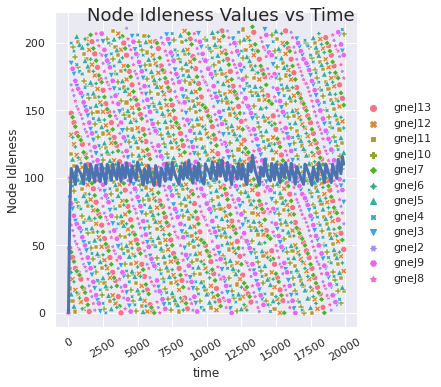

In [7]:
# plot scatter plot of idleness vs time for all nodes

plt.figure()
sns.set_style('whitegrid')
sns.set_context(font_scale= 1, rc = {"font.size" : 15, "axes.titlesize" : 20})
# plt.subplots(figsize = (10, 20))
# plt.subplots_adjust(top= 0.2)
sns.set(rc = {'figure.figsize':(20, 100)})
sns.relplot(data= df1.loc[::100, nodes], kind='scatter')
plt.suptitle('Node Idleness Values vs Time', size = 18)
sns.lineplot(data = df1.iloc[::100], x = 'time', y = df1.loc[::100, nodes].mean(axis = 1), legend = False, linewidth = 3)
plt.xticks(rotation = 30)
plt.ylabel('Node Idleness')
plt.show()

In [13]:
d = 20 #radius of nodes
edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = graph.nodes[edge[0]]['x'], graph.nodes[edge[0]]['y']
    x1, y1 = graph.nodes[edge[1]]['x'], graph.nodes[edge[1]]['y']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888', shape = 'linear'), hoverinfo='none', mode='lines')

node_x = []
node_y = []
avg_idle = []
max_idle = []
for node in graph.nodes():
    x, y = graph.nodes[node]['x'], graph.nodes[node]['y']
    node_x.append(x)
    node_y.append(y)
    avg_idle.append(df1[node].mean())
    max_idle.append(df1[node].max())

In [45]:
#visualizing graph


node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=False,
        color=[],
        size=2 * d,
        # opacity = 0.5,
        # showscale = False,
        # colorbar=dict(
        #     thickness=15,
        #     title='Node Connections',
        #     xanchor='left',
        #     titleside='right'
        # ),
        line_width=0))

fig = go.Figure(data=[node_trace],
            layout=go.Layout(
            title='Graph \'{}\''.format(config['graph']),
            titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            width=1200,
            height=1000)
            )

# fig.add_trace(go.Heatmap(x = node_x, y = node_y, z = node_z))
for i in range(0, len(edge_x), 3):
    # print (edge_x[i])
    x0 = edge_x[i + 1]  # arrows' head
    y0 = edge_y[i + 1]  # arrows' head
    x1 = edge_x[i]  # arrows' tail
    y1 = edge_y[i]  # arrows' tail
    # print (x0, y0, x1, y1)

    vert = True
    if x0 != x1:
        m = (y1 - y0)/(x1 - x0)
        c = y0 - m * x0
        vert = False
    
    if vert:
        yt = y0 + d * np.sign(y1 - y0)
        yh = y1 - d * np.sign(y1 - y0)
        xt = x0
        xh = x1
    else:
        if y1 == y0:
            xt = x0 + d * np.sign(x1 - x0)
            xh = x1 - d * np.sign(x1 - x0)
            yt = y0
            yh = y1
        else:
            xt = x0 + math.sqrt((d) ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            xh = x1 - math.sqrt((d) ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            yt = m * xt + c
            yh = m * xh + c
    

    fig.add_annotation(
        x=xh,  # arrows' head
        y=yh,  # arrows' head
        ax=xt,  # arrows' tail
        ay=yt,  # arrows' tail
        xref='x',
        yref='y',
        axref='x',
        ayref='y',
        text='',  # if you want only the arrow
        showarrow=True,
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor='black'
        )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()



In [43]:
#color map of average idleness
avg_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=False,
        color=avg_idle,
        size=2 * d,
        # cmin = 0.,
        # cmax = 200.,
        # opacity = 0.5,
        # showscale = False,
        colorbar=dict(
            thickness=15,
            title='Avg. Node<br>Idleness',
            xanchor='right',
            titleside='top',
        ),
        line_width=0))
# avg_trace.marker.cmin = 200

fig = go.Figure(data=[avg_trace],
            layout=go.Layout(
            title='Graph \'{}\''.format(config['graph']),
            titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=0,t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            width=1200,
            height=1000))

# fig.add_trace(go.Heatmap(x = node_x, y = node_y, z = node_z))
for i in range(0, len(edge_x), 3):
    # print (edge_x[i])
    x0 = edge_x[i + 1]  # arrows' head
    y0 = edge_y[i + 1]  # arrows' head
    x1 = edge_x[i]  # arrows' tail
    y1 = edge_y[i]  # arrows' tail
    # print (x0, y0, x1, y1)

    vert = True
    if x0 != x1:
        m = (y1 - y0)/(x1 - x0)
        c = y0 - m * x0
        vert = False
    
    if vert:
        yt = y0 + d * np.sign(y1 - y0)
        yh = y1 - d * np.sign(y1 - y0)
        xt = x0
        xh = x1
    else:
        if y1 == y0:
            xt = x0 + d * np.sign(x1 - x0)
            xh = x1 - d * np.sign(x1 - x0)
            yt = y0
            yh = y1
        else:
            xt = x0 + math.sqrt(d ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            xh = x1 - math.sqrt(d ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            yt = m * xt + c
            yh = m * xh + c
    

    fig.add_annotation(
        x=xh,  # arrows' head
        y=yh,  # arrows' head
        ax=xt,  # arrows' tail
        ay=yt,  # arrows' tail
        xref='x',
        yref='y',
        axref='x',
        ayref='y',
        text='',  # if you want only the arrow
        showarrow=True,
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor='black'
        )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)
fig.update_layout(title_text='Average Node Idleness', title_x=0.5, titlefont_size = 20, plot_bgcolor = 'rgba(0, 0, 0, 0)')

fig.show()


In [41]:
#color map of maximum idleness
max_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=False,
        color=max_idle,
        size=2 * d,
        # cmin = 0.,
        # cmax = 300.,
        # opacity = 0.5,
        # showscale = False,
        colorbar=dict(
            thickness=15,
            title='Max. Node<br>Idleness',
            xanchor='right',
            titleside='top'
        ),
        line_width=0))

fig = go.Figure(data=[max_trace],
            layout=go.Layout(
            # title='Graph \'{}\''.format(config['graph']),
            # titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=0,t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False), 
            width=1200,
            height=1000)
            )

# fig.add_trace(go.Heatmap(x = node_x, y = node_y, z = node_z))
for i in range(0, len(edge_x), 3):
    # print (edge_x[i])
    x0 = edge_x[i + 1]  # arrows' head
    y0 = edge_y[i + 1]  # arrows' head
    x1 = edge_x[i]  # arrows' tail
    y1 = edge_y[i]  # arrows' tail
    # print (x0, y0, x1, y1)

    vert = True
    if x0 != x1:
        m = (y1 - y0)/(x1 - x0)
        c = y0 - m * x0
        vert = False
    
    if vert:
        yt = y0 + d * np.sign(y1 - y0)
        yh = y1 - d * np.sign(y1 - y0)
        xt = x0
        xh = x1
    else:
        if y1 == y0:
            xt = x0 + d * np.sign(x1 - x0)
            xh = x1 - d * np.sign(x1 - x0)
            yt = y0
            yh = y1
        else:
            xt = x0 + math.sqrt(d ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            xh = x1 - math.sqrt(d ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            yt = m * xt + c
            yh = m * xh + c
    

    fig.add_annotation(
        x=xh,  # arrows' head
        y=yh,  # arrows' head
        ax=xt,  # arrows' tail
        ay=yt,  # arrows' tail
        xref='x',
        yref='y',
        axref='x',
        ayref='y',
        text='',  # if you want only the arrow
        showarrow=True,
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor='black'
        )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)
fig.update_layout(title_text='Maximum Node Idleness', title_x=0.5, titlefont_size = 20, plot_bgcolor = 'rgba(0, 0, 0, 0)')

fig.show()


In [40]:
#color map of probability of next node
next_edge_count = dict(df2.iloc[-1])
next_edge_count.pop('time')
prob_next_visit = {}
for n in nodes:
    succ = list(graph.successors(n))
    total_visits = 0
    for s in succ:
        total_visits += next_edge_count[graph[n][s]['name']]
    for s in succ:
        prob_next_visit[graph[n][s]['name']] = next_edge_count[graph[n][s]['name']]/total_visits

# print(prob_next_visit)
# print(edges)
max_count = max(list(next_edge_count.values()))
# print(max_count)
l = 100
edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888', shape = 'linear'), opacity= 0.5, hoverinfo='none', mode='lines')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=False,
        color=[],
        size=2 * d,
        # cmin = 0.,
        # cmax = 300.,
        # opacity = 0.5,
        # showscale = False,
        colorbar=dict(
            thickness=15,
            title='Max. Node<br>Idleness',
            xanchor='right',
            titleside='top'
        ),
        line_width=0))

fig = go.Figure(data=[node_trace, edge_trace],
            layout=go.Layout(
            # title='Graph \'{}\''.format(config['graph']),
            # titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=0,t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            width=1200,
            height= 1000)
            )

# fig.add_trace(go.Heatmap(x = node_x, y = node_y, z = node_z))
for i in range(0, len(edge_x), 3):
    # print (edge_x[i])
    e = edges[i//3]
    len_e  = prob_next_visit[e] * l
    x0 = edge_x[i + 1]  # arrows' head
    y0 = edge_y[i + 1]  # arrows' head
    x1 = edge_x[i]  # arrows' tail
    y1 = edge_y[i]  # arrows' tail
    # print (x0, y0, x1, y1)

    vert = True
    if x0 != x1:
        m = (y1 - y0)/(x1 - x0)
        c = y0 - m * x0
        vert = False
    
    if vert:
        yt = y0 + d * np.sign(y1 - y0)
        yh = yt + len_e * np.sign(y1 - y0)
        xt = x0
        xh = x1
    else:
        if y1 == y0:
            xt = x0 + d * np.sign(x1 - x0)
            xh = xt + len_e * np.sign(x1 - x0)
            yt = y0
            yh = y1
        else:
            xt = x0 + math.sqrt(d ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            xh = xt + math.sqrt(len_e ** 2 / (m ** 2 + 1)) * np.sign(x1 - x0)
            yt = m * xt + c
            yh = m * xh + c
    
    cval = color_map_color(value = next_edge_count[e], vmin = 0, vmax = max_count)
    # print(cval)
    fig.add_annotation(
        x=xh,  # arrows' head
        y=yh,  # arrows' head
        ax=xt,  # arrows' tail
        ay=yt,  # arrows' tail
        xref='x',
        yref='y',
        axref='x',
        ayref='y',
        text='',  # if you want only the arrow
        showarrow=True,
        arrowhead=1,
        arrowsize=2,
        arrowwidth=1,
        arrowcolor=cval,
        )
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)
fig.update_layout(title_text = 'Distribution over Neighbours', title_x=0.5, titlefont_size = 20, plot_bgcolor = 'rgba(0, 0, 0, 0)')

fig.show()


In [34]:
#Bot Histogram
edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=[0] * len(edge_x), opacity=1, hoverinfo='none', mode='lines')

node_trace = go.Scatter3d(
    x=node_x, y=node_y,z=[0] * len(nodes),
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='Blues',
        reversescale=False,
        color=[],
        size=2 * d/10,
        cmin = 0.,
        cmax = 300.,
        # opacity = 0.5,
        # showscale = False,
        colorbar=dict(
            thickness=15,
            title='Max. Node<br>Idleness',
            xanchor='right',
            titleside='top'
        ),
        line_width=0))

fig = go.Figure(data=[node_trace, edge_trace],
            layout=go.Layout(
            # title='Graph \'{}\''.format(config['graph']),
            # titlefont_size=16,
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=0,t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
            )

for bot in df3.index:
    # print(bot)
    h = [df3[n][bot] for n in nodes]
    fig.add_trace(go.Mesh3d(x = node_x, y = node_y, z = h, opacity= 0.3, name = bot))
fig.update_traces(alphahull = -1, selector= dict(type = 'mesh3d'))
fig.show()